# Cleaning - missing and duplicate data

In [166]:
import matplotlib.pyplot as plt
import seaborn as sns
# plt.style.use('ggplot')
import pandas as pd
import numpy as np

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Set max rows and columns displayed in jupyter
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

## Generate a t-shirt order<br>
have a name, a t-shirt size, a t-shirt color and a weight(in pounds)<br>
Uses the <a href="https://pypi.org/project/names/https://pypi.org/project/names/">names </a> module to generate random names

In [240]:
import utils as ut

In [167]:
import utils as ut
df = ut.generate_tshirt_order()
df

,weight,t_shirt_size,t_shirt_color,name
0,74.705700,small,blue,Julie Alexander
1,109.723362,small,green,Liliana Potocki
2,86.350225,small,red,Jason Kirker
3,77.097226,small,orange,Cynthia Doyle
4,140.482201,small,orange,Mark Lemley
...,...,...,...,...
295,226.145605,large,green,Dorothy Jones
296,236.097320,large,red,David Edwards
297,156.383486,large,green,Timothy Brown
298,224.805335,large,blue,Alvin Kinney


### Make some duplicates

In [168]:
# make some duplicates just to show how to handle duplicates (delete them)
#lets find the oldest male and female
def fun1(df,numb=5):
    #generates numb rows from df
    return (df.iloc[0:numb,:])


#generates numb rows from each group to be used as duplicates
df_dups=df.groupby('t_shirt_size').apply(fun1, numb=5)
df_dups

weight t_shirt_size t_shirt_color                name
t_shirt_size                                                               
large        200  193.806132        large         black    Christopher Pham
             201  187.176802        large        orange  Dorothy Glendening
             202  167.093080        large           red       Dennis Horner
             203  189.095979        large           red        Daniel Hayes
             204  126.744327        large         green          Lori Wynne
medium       100  152.363812       medium           red       John Galloway
             101  147.811995       medium        orange        Matthew Grow
             102  140.748079       medium         black        Calvin Vigil
             103  130.678176       medium        orange      Patrick Staggs
             104  160.524378       medium        orange          Ray Rivers
small        0     74.705700        small          blue     Julie Alexander
             1    109.723362        small         green     Liliana Potocki
             2     86.350225        small           red        Jason Kirker
             3     77.097226        small        orange       Cynthia Doyle
             4    140.482201        small        orange         Mark Lemley

### Append to original dataframe

In [169]:
df=df.append(df_dups, ignore_index=True)
len(df)

315

In [171]:
df.name.duplicated().sum()

15

### randomly select 20% of rows for t_shirt_size ommision

In [172]:
#first save orig size for later comparison
df['t_shirt_size_orig'] = df['t_shirt_size']

In [173]:
import random
res = random.sample(range(0, len(df)), int(0.2 * len(df)))
print(f'Number of rows to have "t_shirt_size" set to np.Nan is {len(res)}' )
for loc in res:
    df.loc[loc,'t_shirt_size'] = np.NaN

Number of rows to have "t_shirt_size" set to np.Nan is 63


In [178]:
df.isna().sum().sum()

63

In [175]:
#how many are null?
df.t_shirt_size.isna().sum()

63

In [179]:
#show the missing data
df[df.t_shirt_size.isna()]

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
2,86.350225,NaN,red,Jason Kirker,small
5,89.049577,NaN,green,James Mason,small
6,103.440443,NaN,blue,Ruth Benedict,small
7,117.007726,NaN,green,Todd Yerian,small
10,87.192775,NaN,black,Claudia Cotton,small
16,106.226613,NaN,blue,Heather Deming,small
29,88.388816,NaN,black,William Davis,small
31,96.568471,NaN,green,Ashley Rosenberg,small
32,79.381003,NaN,black,Catherine Freeman,small
42,101.110128,NaN,green,Staci Santos,small


### Lets take a look at the distribution

#### kind ='hist', hist will bin the number of weights and display them, hue will determine which color group they belong to

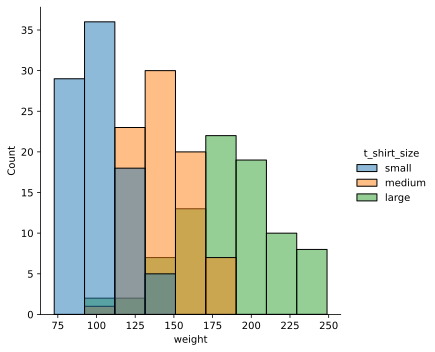

In [180]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='hist', fill=True);

#### kind ='kde', kde is a kernel density estimater, essentially calculates a gaussian distribution around each point, and then adds these distributions, and then divides by the number of points to get the smooth curves you see that have an area of 1.  I'm showing it because its easier to see the distributions

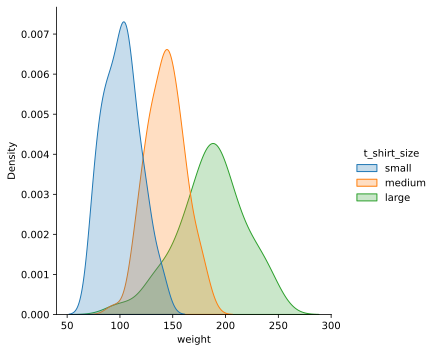

In [181]:
sns.displot(data=df, x="weight",  hue="t_shirt_size", kind='kde', fill=True);

## What to do about duplicates?  Delete them!

### Find them first

In [183]:
df.duplicated(keep=False).sum()

18

### Visually Verify 

In [184]:
df[df.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig
300,193.806132,large,black,Christopher Pham,large
200,193.806132,large,black,Christopher Pham,large
3,77.097226,small,orange,Cynthia Doyle,small
313,77.097226,small,orange,Cynthia Doyle,small
203,189.095979,NaN,red,Daniel Hayes,large
303,189.095979,NaN,red,Daniel Hayes,large
302,167.093080,NaN,red,Dennis Horner,large
202,167.093080,NaN,red,Dennis Horner,large
310,74.705700,small,blue,Julie Alexander,small
0,74.705700,small,blue,Julie Alexander,small


### Looks good lets dump them

In [185]:
df.drop_duplicates(inplace=True)

## What if one of the duplicated rows is missing the t-shirt size?  Then duplicated() will not find it.  Maybe we should check for duplicates in the 'name' column instead

In [186]:
df.name.duplicated(keep=False).sum()

12

### Verify that they are duplicates first

In [189]:
df[df.name.duplicated(keep=False)].sort_values(by='name')

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig


### We want to delete the one that has a np.nan for t_shirt_size.

In [188]:
df.drop( df[df.name.duplicated(keep=False) & (df.t_shirt_size.isna())].index, inplace=True)

## Duplicates are gone, now how to impute the missing fields

In [229]:
# how many match
def printstats(df):
    tmp = df[(df['t_shirt_size_indicator']==True)]
    numb=len(tmp)
    numbmatches=(tmp['t_shirt_size_orig']==tmp['t_shirt_size']).sum()
    print(f'Correctly imputed {numbmatches} out of {numb} missing values')

### One way is to use SimpleImputer and assign the median value to all the missing values


In [227]:
df_med=df.copy()

In [228]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent',add_indicator=True)  #works with strings
imp = imp.fit(df_med[['t_shirt_size']])   #here is where it determines what the most frequent is
df_med[['t_shirt_size','t_shirt_size_indicator']]=imp.transform(df_med[['t_shirt_size']])  #here is where the transform is applied to create a new column 
df_med

,weight,t_shirt_size,t_shirt_color,name,t_shirt_size_orig,t_shirt_size_indicator
0,74.705700,small,blue,Julie Alexander,small,False
1,109.723362,small,green,Liliana Potocki,small,False
3,77.097226,small,orange,Cynthia Doyle,small,False
4,140.482201,small,orange,Mark Lemley,small,False
5,89.049577,small,green,James Mason,small,True
...,...,...,...,...,...,...
297,156.383486,large,green,Timothy Brown,large,False
298,224.805335,large,blue,Alvin Kinney,large,False
299,139.094930,small,blue,Lorie Newton,large,True
301,187.176802,large,orange,Dorothy Glendening,large,False


In [230]:
printstats(df_med)

Correctly imputed 16 out of 55 missing values


In [37]:
#show calculated verses actual
# df_med[df_med['t_shirt_size'].isna()]

### Another way is to find the mean weight for each t-shirt size, and then assign missing value t-shirt size based on weight<br>
For each NaN assign t-shirt size to closest mean

#### First calculate average weight for each t-shirt size

In [248]:
df_better = df.copy()

In [249]:
avgs = df_better.groupby('t_shirt_size').mean()
avgs.weight

t_shirt_size
large     185.956128
medium    143.335828
small     101.943442
Name: weight, dtype: float64

In [250]:
#how many in each group
df_better.groupby('t_shirt_size').count()

,weight,t_shirt_color,name,t_shirt_size_orig
t_shirt_size,,,,
large,82,82,82,82
medium,79,79,79,79
small,84,84,84,84


#### Impute the value, replace the NaN, and add a 1 in a column to indicate that this value was imputed 
<mark>The indicater column will inform a ML algorithm that this value was imputed

In [251]:
#map works on a column apply works on a row, which means we have access tothe entire row
#can also return more than 1 value so that we can have an indicator value

def func(row):
    if row.t_shirt_size is np.NaN:
        #get a list of differences between this weight and average weights
        lst_vals = [abs(row.weight-val) for val in avgs.weight]

        #get the index of the minimum value
        min_val = min(lst_vals)
        min_index=lst_vals.index(min_val)

        #return t_shirt_size corresponding to this index
        return pd.Series([avgs.index[min_index],True],index=['t_shirt_size','t_shirt_size_indicator'])
    #its not missing, return what's there
    return pd.Series([row.t_shirt_size,False],index=['t_shirt_size','t_shirt_size_indicator'])
df_better['t_shirt_size_indicator']=False
df_better[['t_shirt_size','t_shirt_size_indicator']]=df_better.apply(func, axis=1)

In [252]:
printstats(df_better)

Correctly imputed 42 out of 55 missing values


## Save results to feather file for later processing

In [256]:
#clean up for feather saving
df_better.reset_index(drop=True,inplace=True)

In [259]:
#save
df_better.to_feather(ut.PROCESSED_DATA)

#reload
df_better=pd.read_feather(ut.PROCESSED_DATA)


# Generate Slide for the lecture

In [82]:
def func(df, numb=5):
    return (df.iloc[0:numb,:])
    
df.groupby('t_shirt_size', dropna=False).apply(func,numb=3)

weight t_shirt_size t_shirt_color               name  \
t_shirt_size                                                                 
large        200  175.806332        large         black      Wilda Englert   
             201  171.565476        large           red        Daryl Brown   
             202  171.112118        large         green   Danielle Edmonds   
med          100  139.421949          med           red        Royce Myers   
             101  153.059410          med          blue        James Bogan   
             102  156.298322          med        orange     Henry Mcintosh   
small        0    105.609500        small         black         George May   
             1    109.797011        small         black  Samuel Montgomery   
             2     95.883111        small        orange        Paula Moore   
NaN          3    104.410387          NaN           red       Steven Lopez   
             5     97.890768          NaN         green      Barbara Flynn   
             9     95.713558          NaN         black     Kathleen Reese   

                 t_shirt_size_orig  
t_shirt_size                        
large        200             large  
             201             large  
             202             large  
med          100               med  
             101               med  
             102               med  
small        0               small  
             1               small  
             2               small  
NaN          3               small  
             5               small  
             9               small